# Run Random Linear Classifier

- Algorithm: Aim: To find optimal θ0, θ1, θ2
    - Step 1: Try k random choices of θ0, θ1, θ2
    - Step 2: Compute training error for each of the 'k' hypothesis
    - Step 3: Choose the hypothesis with the lowest error.

`objective: Choose the straight line that gives you lowest training error.`

`How is Training error obtained?`
- Let's say the hypothesis chosen is `θ1x1 + θ2x2 + θ0x0 = 0`
- For all training points we compute the hypothesis.
    - if this above hypothesis > 0 then your hypothesis will predict answer to be `+1`
    - if hypothesis < 0 then its -1

- This is computed for all the points.    




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# Dogs: Higher ear flapiness index, lower whisker length
dogs_whisker_len = np.random.normal(loc = 5, scale = 1, size = 10)
dogs_ear_idx = np.random.normal(loc = 8, scale = 1, size = 10)

# Cats: lower ear flapiness idx, higher whisker length
cats_whisker_len = np.random.normal(loc = 8, scale = 1, size= 10)
cats_ear_idx = np.random.normal(loc = 5, scale = 1, size = 10)



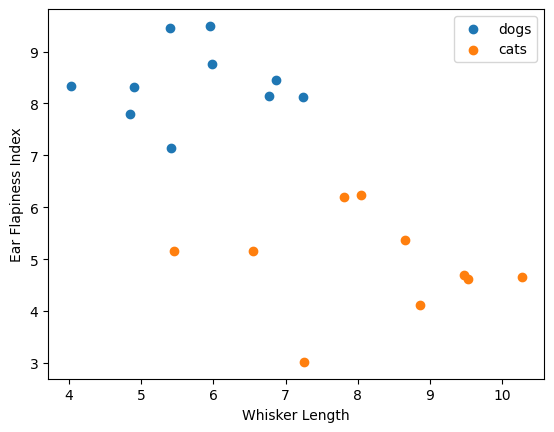

In [264]:
plt.scatter(dogs_whisker_len, dogs_ear_idx, label = 'dogs')
plt.scatter(cats_whisker_len, cats_ear_idx, label = 'cats')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flapiness Index')
plt.legend()
plt.show()


In [265]:
# stack data
dogs_df = np.vstack((dogs_whisker_len, dogs_ear_idx)).T
cats_df = np.vstack((cats_whisker_len, cats_ear_idx)).T

dogs_df


array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [266]:
cats_df

array([[ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

In [267]:
def random_linear_classifier(
        dogs_df, cats_df,
        num_iter = 5,
        num_features = 2):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(num_iter):
        # Randomly initialize theta and theta0
        theta = np.random.normal(size = num_features)
        theta0 = np.random.normal()

        error = compute_error(dogs_df, cats_df, theta, theta0)
        # print(f"ERROR: {error}")

        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0

    return best_theta, best_theta0, best_error


def compute_error(dogs_df, cats_df, theta, theta0):
    error = 0
    for x in dogs_df:
        if np.dot(theta, x) + theta0 <= 0:
            error += 1
            # print(f"dogs ERROR: {error}")
    for x in cats_df:
        if np.dot(theta, x) + theta0 > 0:
            # print(f"Cats ERROR: {error}")
            error += 1
    return error



In [268]:
# Run random linear classifier
k = 100 # number of iteration
num_features = 2

best_theta, best_theta0, best_error = random_linear_classifier(
    dogs_df,
    cats_df,
    num_iter= k,
    num_features = num_features)

print(f"Best Theta: {best_theta}\nBest theta 0: {best_theta0}\nBest error: {best_error}")

Best Theta: [-1.07075262  1.05445173]
Best theta 0: -0.40317694697317963
Best error: 0


In [269]:
x_vals = np.linspace(2, 10, 100)
y_vals = (-best_theta[0] / best_theta[1]) * x_vals - (best_theta0 / best_theta[1])


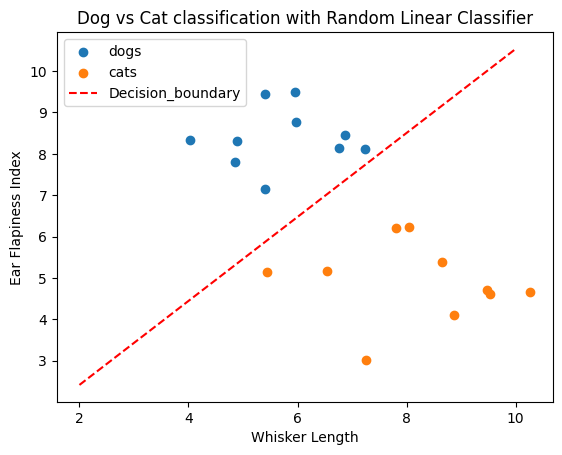

In [270]:
plt.scatter(dogs_whisker_len, dogs_ear_idx, label = 'dogs')
plt.scatter(cats_whisker_len, cats_ear_idx, label = 'cats')
plt.plot(x_vals, y_vals, color ='red', linestyle='--', label = 'Decision_boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flapiness Index')
plt.title("Dog vs Cat classification with Random Linear Classifier")
plt.legend()
plt.show()


## Train & test classification

In [347]:
from sklearn.model_selection import train_test_split, KFold


In [348]:
# add labels
data_df = np.vstack((dogs_df, cats_df))
labels = np.hstack((np.zeros(len(dogs_df)), np.ones(len(cats_df))))


In [349]:
np.random.seed(0)

# split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(data_df, labels, test_size=0.2, random_state=42)
x_test


array([[6.76405235, 8.14404357],
       [7.81281615, 6.20237985],
       [6.54563433, 5.15634897],
       [5.40015721, 9.45427351]])

In [350]:
x_train

array([[ 4.89678115,  8.3130677 ],
       [ 4.02272212,  8.33367433],
       [ 8.6536186 ,  5.37816252],
       [ 7.2408932 ,  8.12167502],
       [ 9.53277921,  4.61267318],
       [ 8.04575852,  6.23029068],
       [ 7.25783498,  3.01920353],
       [ 5.97873798,  8.76103773],
       [ 5.4105985 ,  7.14590426],
       [ 9.46935877,  4.69769725],
       [ 6.86755799,  8.44386323],
       [ 8.8644362 ,  4.11221425],
       [ 4.84864279,  7.79484174],
       [ 5.44701018,  5.15494743],
       [10.26975462,  4.65208785],
       [ 5.95008842,  9.49407907]])

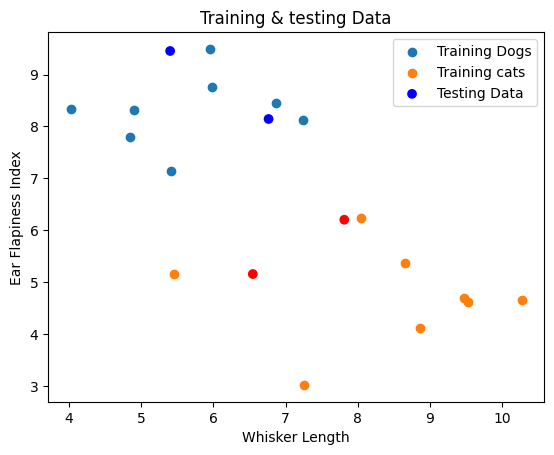

In [351]:
plt.scatter(
    x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], 
    label = 'Training Dogs'
)
plt.scatter(
    x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1],
    label = 'Training cats'
)
plt.scatter(x_test[:,0], x_test[:, 1], c = y_test, cmap = 'bwr', label = 'Testing Data')

plt.xlabel('Whisker Length')
plt.ylabel('Ear Flapiness Index')
plt.title("Training & testing Data")
plt.legend()
plt.show()



In [352]:

best_theta_train, best_theta0_train, train_error = random_linear_classifier(
    x_train[y_train == 0],x_train[y_train == 1],
    num_iter= 100,
    num_features = 2)

print(f"Best Theta: {best_theta_train}\nBest theta 0: {best_theta0_train}\nBest error: {train_error}")


Best Theta: [-1.70627019  1.9507754 ]
Best theta 0: -0.5096521817516535
Best error: 1


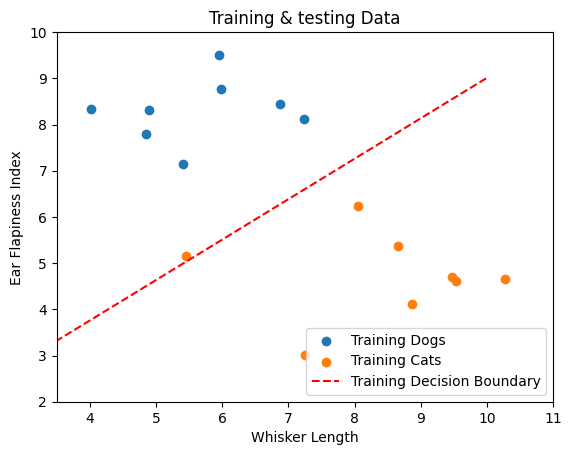

In [353]:
x_vals_train = np.linspace(2, 10, 100)
y_vals_train = (-best_theta_train[0] / best_theta_train[1]) * x_vals_train - (best_theta0_train / best_theta_train[1])

plt.scatter(x_train[y_train == 0][:, 0],
            x_train[y_train == 0][:, 1], label = "Training Dogs")
plt.scatter(x_train[y_train == 1][:, 0],
            x_train[y_train == 1][:, 1], label = "Training Cats")
plt.plot(x_vals_train, y_vals_train, color='red', linestyle = '--', label = "Training Decision Boundary")
# Set same limits for x and y axes
plt.xlim([3.5, 11])
plt.ylim([2, 10])
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flapiness Index')
plt.title("Training & testing Data")
plt.legend()
plt.show()




In [354]:
print(f"Training Error {train_error}")

Training Error 1


## Check performance of best fit line with test data

In [355]:
# Compute test error
test_error = compute_error(x_test[y_test ==0],
              x_test[y_test == 1],
              best_theta_train, best_theta0_train)
print(f"Testing error: {test_error}")


Testing error: 0


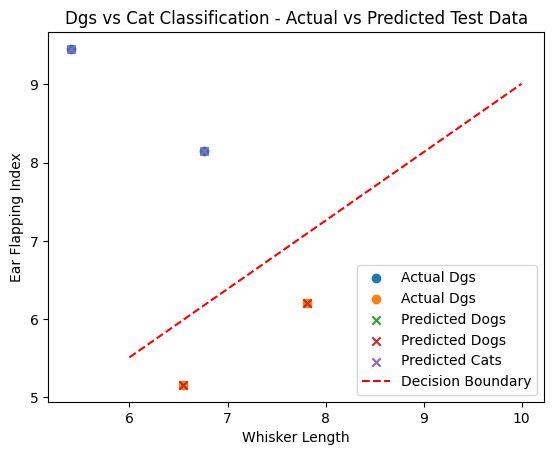

In [369]:
plt.scatter(x_test[y_test == 0][:, 0],
            x_test[y_test == 0][:, 1],
            label = "Actual Dgs")
plt.scatter(x_test[y_test == 1][:, 0],
            x_test[y_test == 1][:, 1],
            label = "Actual Dgs")

# predicted test data points using the decision boundary
predicted_labels = np.zeros_like(y_test)
for i, x in enumerate(x_test):
    if np.dot(best_theta_train, x) + best_theta0_train > 0:
        predicted_labels[i] = 1

# plot predicted test data points
plt.scatter(x_test[predicted_labels == 0][:, 0],
            x_test[predicted_labels == 0][:, 1],
            marker = 'x',
            label = "Predicted Dogs")

# plot predicted test data points
plt.scatter(x_test[predicted_labels == 0][:, 0],
            x_test[predicted_labels == 0][:, 1],
            marker = 'x',
            label = "Predicted Dogs")
plt.scatter(x_test[predicted_labels == 1][:, 0],
            x_test[predicted_labels == 1][:, 1],
            marker = 'x',
            label = "Predicted Cats")

# plot decision boundary
x_vals_test = np.linspace(6, 10, 100)
y_vals_test = (-best_theta_train[0] / best_theta_train[1]) * x_vals_test - (best_theta0_train / best_theta_train[1])

plt.plot(x_vals_test, y_vals_test, color='red', linestyle = '--', label = "Decision Boundary")

plt.xlabel('Whisker Length')
plt.ylabel('Ear Flapping Index')
plt.title("Dgs vs Cat Classification - Actual vs Predicted Test Data")
plt.legend()
plt.show()



## Cross validation
- Uptill now we have evaluated the performance of the algorithm, but we have `what about the performance of the learning algorithm?`
- Training and testing helps us to `evaluate the hypothesis`, but it still `does not tell us how the learning algorithm itself is doing.`

- What is difference between `measuring performance of classifier` vs `measuring performance of learning algorithm`? The answer to this is, technique known as Cross-Validation is used.

#### *************************** CV Process **********************
- Split of train and test remains intact.
- train data is further divided in to 'n' sets or 'n' folds
- `1st iteration:` 1st fold is left out as validation data algo is trained on remaining folds and hypothesis is found. This hypothesis is evaluated on 1st fold and error (E1) isobtained.
- `2nd iteration:` 2nd fold is left out as validation data and then hypothesis is found on by training on remaining folds and error (E2) is obtained.
- this process continues till 'n' folds
- `CVE (cross validation error)` is computed 1/n(e1 + e2 + ...en). THis is computed for number of k values.
- Choose that 'k' with lowest CVE.




In [398]:

def cross_validate(dogs_df, cats_df, k_values, num_features, n_splits = 5):
    kf = KFold(n_splits = n_splits, shuffle = True, random_state = 42)
    avg_errors = []


    for k in k_values:
        errors = []

        for train_idx, val_idx in kf.split(dogs_df):
            x_train_fold = np.vstack((dogs_df[train_idx],
                                     cats_df[train_idx]))
            y_train_fold = np.hstack((
                np.zeros(len(train_idx)),
                np.ones(len(train_idx))
            ))
            x_val_fold = np.vstack((
                dogs_df[val_idx],
                cats_df[val_idx]
            ))
            y_val_fold = np.hstack((
                np.zeros(len(val_idx)),
                np.ones(len(val_idx))
            ))

            best_theta_fold, best_theta0_fold, error = random_linear_classifier(
                x_train_fold[y_train_fold == 0],
                x_train_fold[y_train_fold == 1],
                num_iter = k, num_features = num_features
            )

            errors.append(
                compute_error(
                    x_val_fold[y_val_fold == 0],
                    x_val_fold[y_val_fold == 1],
                    best_theta_fold, best_theta0_fold
                )
            )

        avg_errors.append(np.mean(errors))

    best_k = k_values[np.argmin(avg_errors)]
    return best_k


k_values = [1, 10, 50, 100, 200, 500, 1000]
best_k = cross_validate(dogs_df, cats_df, k_values, num_features = 2)

print(f"Best value of k: {best_k}") 


Best value of k: 200


In [401]:
# Now run random linear classifier in training data 
k = best_k # number of iterations
num_features == 2
best_theta_train, best_theta0_train, train_error = random_linear_classifier(
    x_train[y_train == 0], x_train[y_train == 1],
    num_iter = best_k,
    num_features = num_features
)


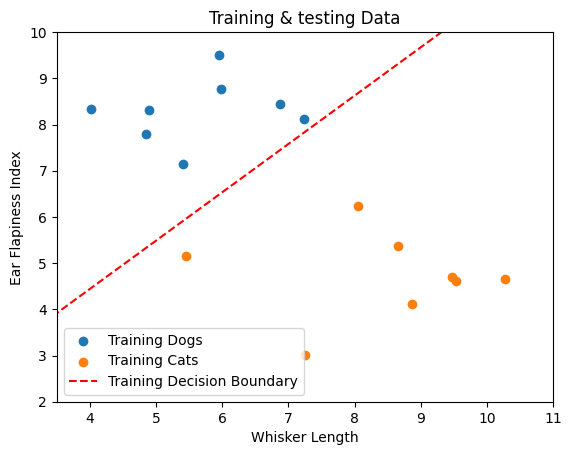

In [403]:
# plot the decision boundary on training data
x_vals_train = np.linspace(2, 10, 100)
y_vals_train = (-best_theta_train[0] / best_theta_train[1]) * x_vals_train - (best_theta0_train / best_theta_train[1])


plt.scatter(x_train[y_train == 0][:, 0],
            x_train[y_train == 0][:, 1], label = "Training Dogs")
plt.scatter(x_train[y_train == 1][:, 0],
            x_train[y_train == 1][:, 1], label = "Training Cats")
plt.plot(x_vals_train, y_vals_train, color='red', linestyle = '--', label = "Training Decision Boundary")
# Set same limits for x and y axes
plt.xlim([3.5, 11])
plt.ylim([2, 10])
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flapiness Index')
plt.title("Training & testing Data")
plt.legend()
plt.show()

In [ ]:
print("Training error:", train_error)


Training error: 0


In [407]:
# Compute test error
test_error = compute_error(x_test[y_test == 0],
                           x_test[y_test == 1],
                           best_theta_train, best_theta0_train)

print(f"Testing error: {test_error}")


Testing error: 0
